In [1]:
%matplotlib inline

In [2]:
##Prerequisite packages
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold,GridSearchCV, cross_val_score 
from sklearn.metrics import mean_squared_error, make_scorer, roc_curve, auc, precision_recall_curve, average_precision_score
from scipy import stats

##Example dataset
from sklearn import datasets

import matplotlib.pyplot as plt



In [3]:
##Example data
boston = datasets.load_boston()
##X
print('Data type:',type(boston.data),type(boston.target))
print('X structure:',boston.data.shape)
print('X:')
print(boston.data[:3])
##Y
print('Y structure', boston.target.shape)
print('Y:')
print(boston.target[:3])

Data type: <class 'numpy.ndarray'> <class 'numpy.ndarray'>
X structure: (506, 13)
X:
[[6.3200e-03 1.8000e+01 2.3100e+00 0.0000e+00 5.3800e-01 6.5750e+00
  6.5200e+01 4.0900e+00 1.0000e+00 2.9600e+02 1.5300e+01 3.9690e+02
  4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 0.0000e+00 4.6900e-01 6.4210e+00
  7.8900e+01 4.9671e+00 2.0000e+00 2.4200e+02 1.7800e+01 3.9690e+02
  9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 0.0000e+00 4.6900e-01 7.1850e+00
  6.1100e+01 4.9671e+00 2.0000e+00 2.4200e+02 1.7800e+01 3.9283e+02
  4.0300e+00]]
Y structure (506,)
Y:
[24.  21.6 34.7]


In [4]:
##Separate data into train & test set = 4:1
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, 
                                                    test_size=test_size, random_state=0)
#random_state: random seed
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(404, 13) (102, 13) (404,) (102,)


In [5]:
##Multiple Linear Regression
model_MLR     = linear_model.LinearRegression()
model_MLR.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [6]:
##MLR statistics
##Reference: https://stackoverflow.com/questions/27928275/find-p-value-significance-in-scikit-learn-linearregression
params = np.append(model_MLR.intercept_,model_MLR.coef_)
predictions = model_MLR.predict(X_train)

newX = np.append(np.ones((len(X_train),1)), X_train, axis=1)
MSE = (sum((y_train-predictions)**2))/(len(newX)-len(newX[0]))

var_b = MSE*(np.linalg.inv(np.dot(newX.T,newX)).diagonal())
sd_b = np.sqrt(var_b)
ts_b = params/ sd_b

p_values =[2*(1-stats.t.cdf(np.abs(i),(len(newX)-1))) for i in ts_b]

sd_b = np.round(sd_b,3)
ts_b = np.round(ts_b,3)
p_values = np.round(p_values,5)
params = np.round(params,3)

SummaryTable = pd.DataFrame()
SummaryTable["Coefficients"],SummaryTable["Standard Errors"],SummaryTable["t values"],SummaryTable["Probabilites"] = [params,sd_b,ts_b,p_values]
print(SummaryTable) #0: intercept 1~13: features

    Coefficients  Standard Errors  t values  Probabilites
0         38.139            5.523     6.905       0.00000
1         -0.118            0.036    -3.246       0.00127
2          0.045            0.014     3.100       0.00207
3          0.006            0.063     0.092       0.92645
4          2.342            0.902     2.596       0.00977
5        -16.163            4.213    -3.837       0.00014
6          3.701            0.458     8.090       0.00000
7         -0.003            0.014    -0.213       0.83180
8         -1.387            0.214    -6.480       0.00000
9          0.244            0.070     3.475       0.00057
10        -0.011            0.004    -2.818       0.00507
11        -1.047            0.137    -7.643       0.00000
12         0.008            0.003     2.786       0.00559
13        -0.494            0.054    -9.108       0.00000


In [7]:
##MLR prediction, estimation
y_pred = model_MLR.predict(X_test)
print('Mean squared error: %.04f' %(mean_squared_error(y_test,y_pred)))
print('Pearson R2: %.04f' %(stats.pearsonr(y_test,y_pred)[0]**2))
print('Spearman rho2: %.04f' %(stats.spearmanr(y_test,y_pred)[0]**2))

Mean squared error: 33.4507
Pearson R2: 0.5908
Spearman rho2: 0.6481


In [8]:
#http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html
#http://scikit-learn.org/stable/auto_examples/svm/plot_svm_regression.html#sphx-glr-auto-examples-svm-plot-svm-regression-py
#preprocessing: IMPORTANT!!!!!
scaler      = StandardScaler().fit(X_train) ## Gaussian with 0 mean and unit variance
X_train     = scaler.transform(X_train)
# Fit support vector regression model
model_SVR   = SVR(kernel='rbf', C=1e3, gamma=0.1) #kernel, C, gamma...: Hyperparameters
model_SVR.fit(X_train, y_train)

X_test      = scaler.transform(X_test)
y_pred      = model_SVR.predict(X_test)
print('Mean squared error: %.04f' %(mean_squared_error(y_test,y_pred)))
print('Pearson R2: %.04f' %(stats.pearsonr(y_test,y_pred)[0]**2))
print('Spearman rho2: %.04f' %(stats.spearmanr(y_test,y_pred)[0]**2))


Mean squared error: 25.2941
Pearson R2: 0.6940
Spearman rho2: 0.6712


In [ ]:
n_folds = 5
scorer  = make_scorer(mean_squared_error)
scores  = cross_val_score(model_SVR, X_train, y_train, cv=n_folds,scoring=scorer)
#OOOOX
#OOOXO
#OOXOO
#OXOOO
#XOOOO
print(scores)
print('%d-fold CV error: %.04f' %(n_folds, np.mean(scores)))

In [9]:
##Hyper_parameter optimization of SVR using grid search of cross validation
n_folds    = 5 #5-fold CV
model_SVR  = SVR()
hyp_params = [{'kernel':['rbf'],'gamma': [0.001,0.01,0.1],'C':[1,10,100,1000]},
              {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

regr   = GridSearchCV(model_SVR,hyp_params,cv=n_folds,scoring='neg_mean_squared_error')
regr.fit(X_train, y_train)
print("Best parameters set found on development set:")
print(regr.best_params_)
means = regr.cv_results_['mean_test_score']
stds  = regr.cv_results_['std_test_score']
print("Grid scores on development set:")
for mean, std, params in zip(means, stds, regr.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))

Best parameters set found on development set:
{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}
Grid scores on development set:
-65.264 (+/-28.032) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
-34.418 (+/-23.739) for {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
-30.648 (+/-17.722) for {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
-32.004 (+/-22.140) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
-16.340 (+/-12.709) for {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
-14.611 (+/-8.481) for {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
-20.701 (+/-15.691) for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
-12.098 (+/-6.666) for {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
-11.839 (+/-6.773) for {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}
-14.296 (+/-10.876) for {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
-12.999 (+/-8.236) for {'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}
-14.611 (+/-7.710) for {'C': 1000, 'gamma': 0.1, 'kernel': 'rbf'}
-22.440 (+/-15.471) for {'C': 1, 'kernel': 'linear'}
-22.404 (+/-15.264) for {'C': 10, 

In [10]:
y_pred =   regr.predict(X_test)
print('Mean squared error: %.04f' %(mean_squared_error(y_test,y_pred)))
print('Pearson R2: %.04f' %(stats.pearsonr(y_test,y_pred)[0]**2))
print('Spearman rho2: %.04f' %(stats.spearmanr(y_test,y_pred)[0]**2))

Mean squared error: 20.6781
Pearson R2: 0.7472
Spearman rho2: 0.7282


In [11]:
## ROC/PR curve, AUC
print(np.mean(boston.target))
#Let's set separation criteria as 30
cutoff = 25
print('Over  %d (1)' %cutoff,len([i for i in boston.target if i>cutoff]))
print('Under %d (0)' %cutoff,len([i for i in boston.target if i<=cutoff]))

y_test_binary        = np.where(y_test>cutoff,1,0)
fpr, tpr, _          = roc_curve(y_test_binary,y_pred)
precision, recall, _ = precision_recall_curve(y_test_binary, y_pred)
average_precision    = average_precision_score(y_test_binary, y_pred)
roc_auc              = auc(fpr,tpr)


22.532806324110677
Over  25 (1) 124
Under 25 (0) 382


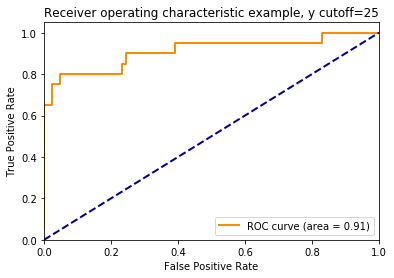

In [12]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example, y cutoff=%d' %cutoff)
plt.legend(loc="lower right")
plt.show()
plt.close()

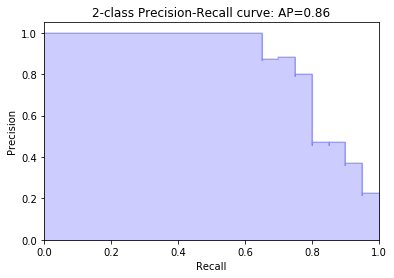

In [13]:
plt.figure()

plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))
plt.show()
plt.close()